In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
%run '/content/pandas_missing_extension.ipynb'

In [3]:
!pip install nhanes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.7 MB/s eta 0:00:00


In [4]:
import nhanes.load
nhanes_df = nhanes.load.load_NHANES_data(year="2017-2018")
nhanes_df

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never


In [5]:
nhanes_df = nhanes_df[[
        'GeneralHealthCondition',
        'Gender',
        'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays',
       'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage',
       'AgeFirstFedMilkdays']]
nhanes_df

,GeneralHealthCondition,Gender,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays
SEQN,,,,,,,
93703.0,NaN,Female,273.0,1.0,365.0,152.0,365.0
93704.0,NaN,Male,60.0,3.0,365.0,126.0,365.0
93705.0,Good,Female,NaN,NaN,NaN,NaN,NaN
93706.0,Very good,Male,NaN,NaN,NaN,NaN,NaN
93707.0,Good,Male,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
102952.0,Very good,Female,NaN,NaN,NaN,NaN,NaN
102953.0,Fair or,Male,NaN,NaN,NaN,NaN,NaN
102954.0,Good,Female,NaN,NaN,NaN,NaN,NaN


In [6]:
nhanes_df.missing.number_missing()

39259

In [7]:
nhanes_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,GeneralHealthCondition,2402,8366,28.711451
1,Gender,0,8366,0.000000
2,AgeStoppedBreastfeedingdays,7504,8366,89.696390
3,AgeFirstFedFormuladays,7289,8366,87.126464
4,AgeStoppedReceivingFormuladays,7475,8366,89.349749
5,AgeStartedOtherFoodbeverage,7289,8366,87.126464
6,AgeFirstFedMilkdays,7300,8366,87.257949


In [8]:
nhanes_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,7289,2,28.571429
1,0,1,14.285714
2,2402,1,14.285714
3,7300,1,14.285714
4,7475,1,14.285714
5,7504,1,14.285714


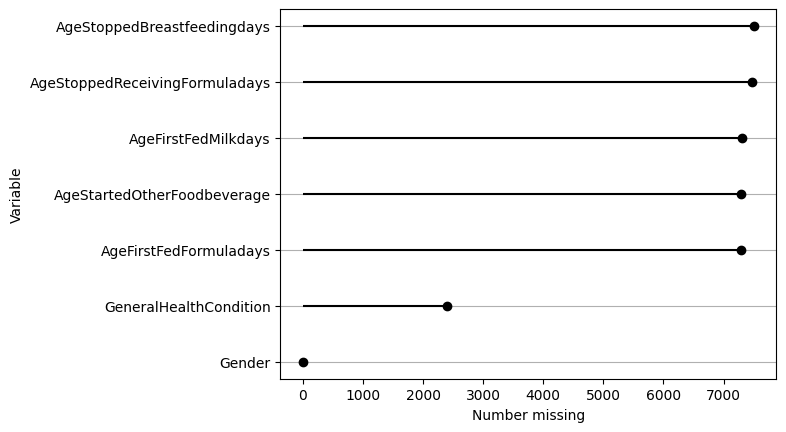

In [9]:
nhanes_df.missing.missing_variable_plot()

<Axes: >

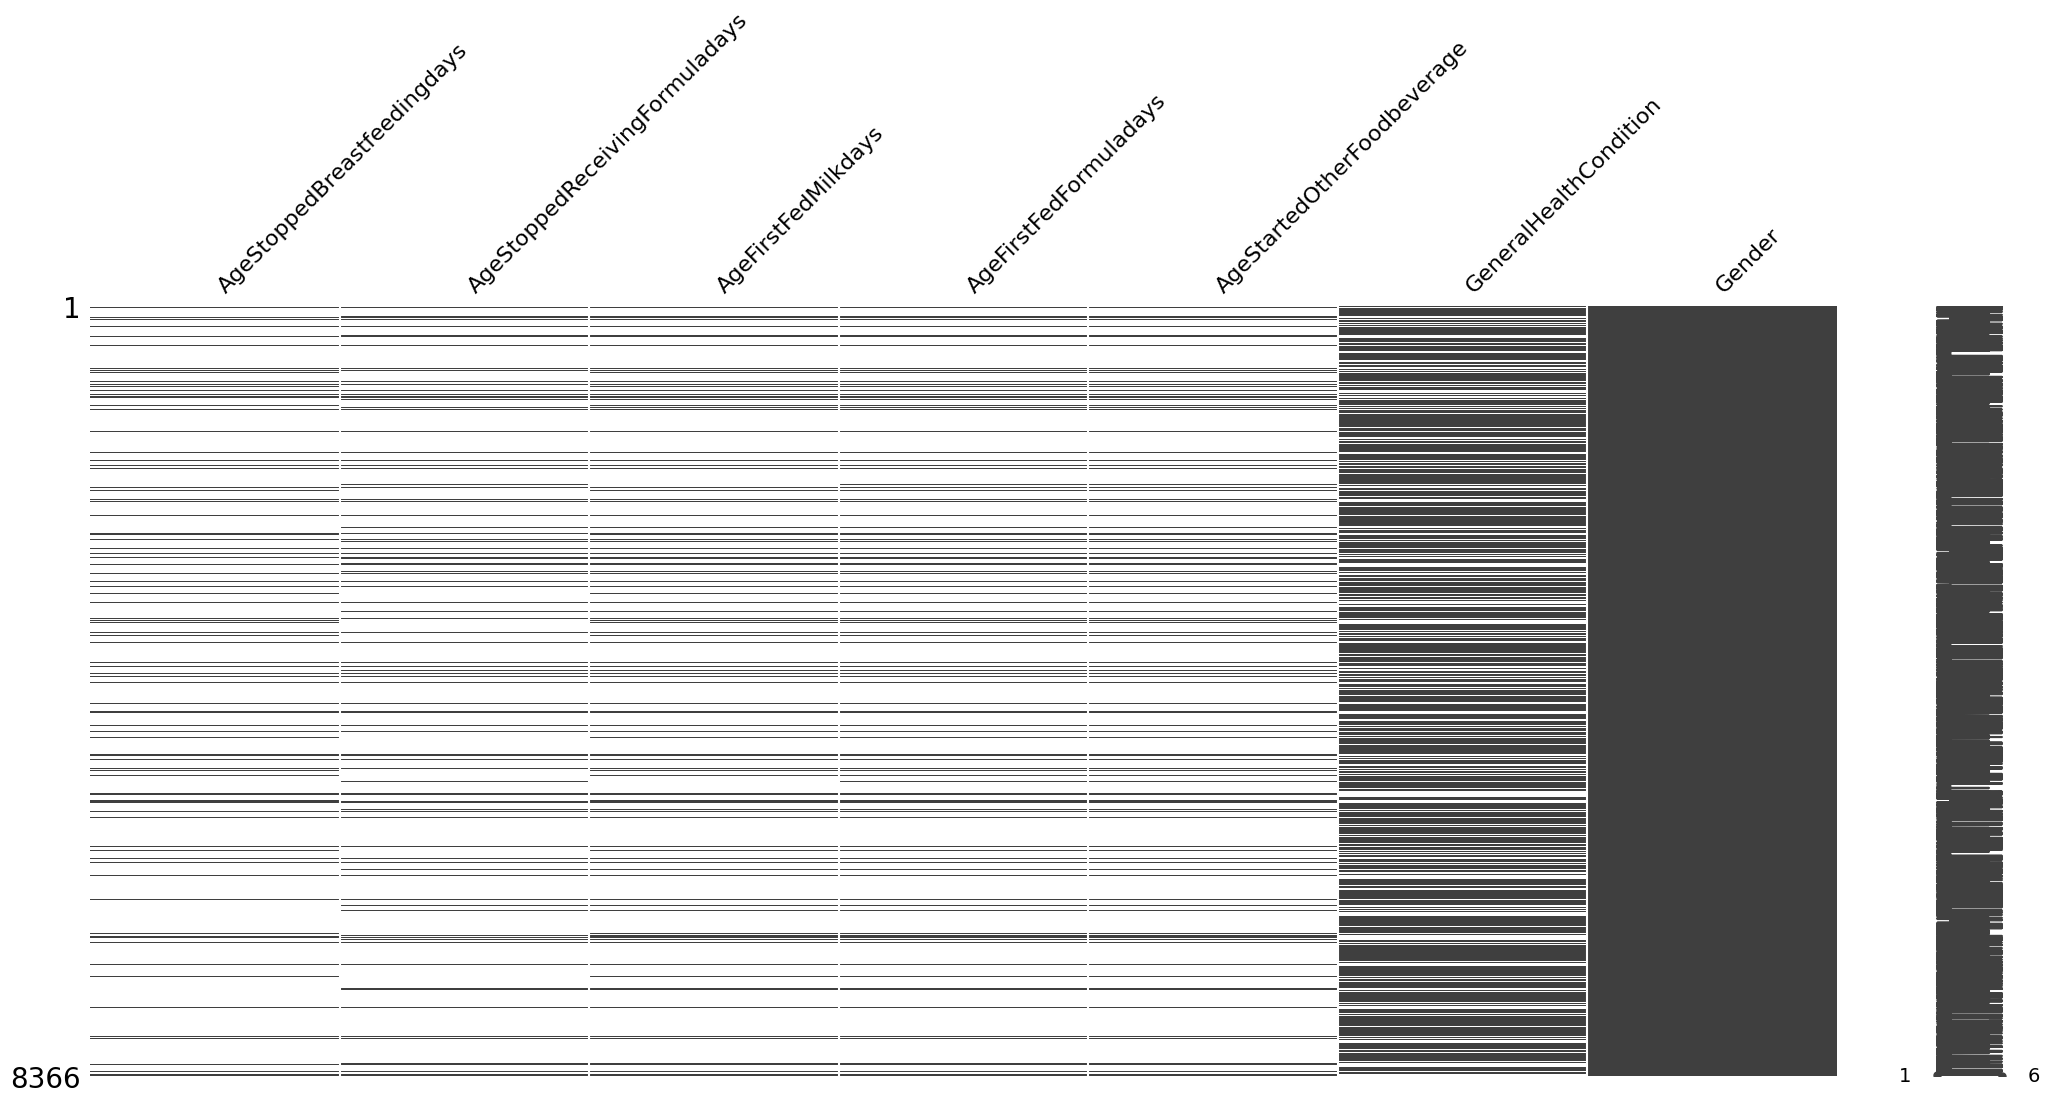

In [10]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

#IMPUTACIÓN DE AgeStoppedBreastfeedingdays

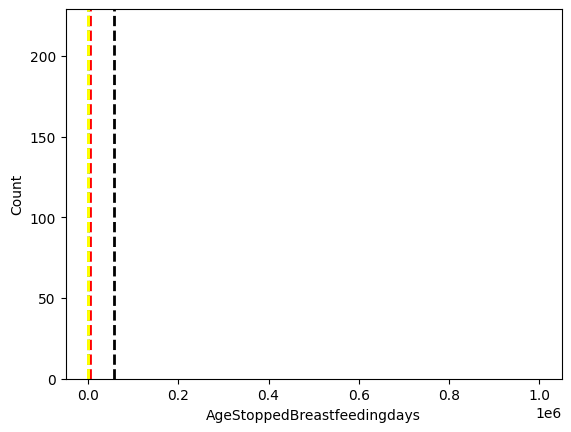

In [25]:
df = nhanes_df
variable = 'AgeStoppedBreastfeedingdays'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

In [24]:
df_mean = nhanes_df.copy()
df_mean[variable] = df_mean[variable].fillna(df_mean[variable].mean())
print(f" media original : {nhanes_df[variable].mean()} | media sin nulos : {df_mean[variable].mean()}")

 media original : 4116.931554524362 | media sin nulos : 4116.931554524361


In [19]:
df_median = nhanes_df.copy()
df_median[variable] = df_median[variable].fillna(df_median[variable].median())
print(f" mediana original : {nhanes_df[variable].median()} | mediana sin nulos : {df_median[variable].median()}")

 mediana original : 182.0 | mediana sin nulos : 182.0


In [20]:
df_mode = nhanes_df.copy()
df_mode[variable] = df_mode[variable].fillna(df_mode[variable].mode())
print(f" mediana original : {nhanes_df[variable].mode()} | mediana sin nulos : {df_mode[variable].mode()}")

 mediana original : 0    182.0
Name: AgeStoppedBreastfeedingdays, dtype: float64 | mediana sin nulos : 0    182.0
Name: AgeStoppedBreastfeedingdays, dtype: float64


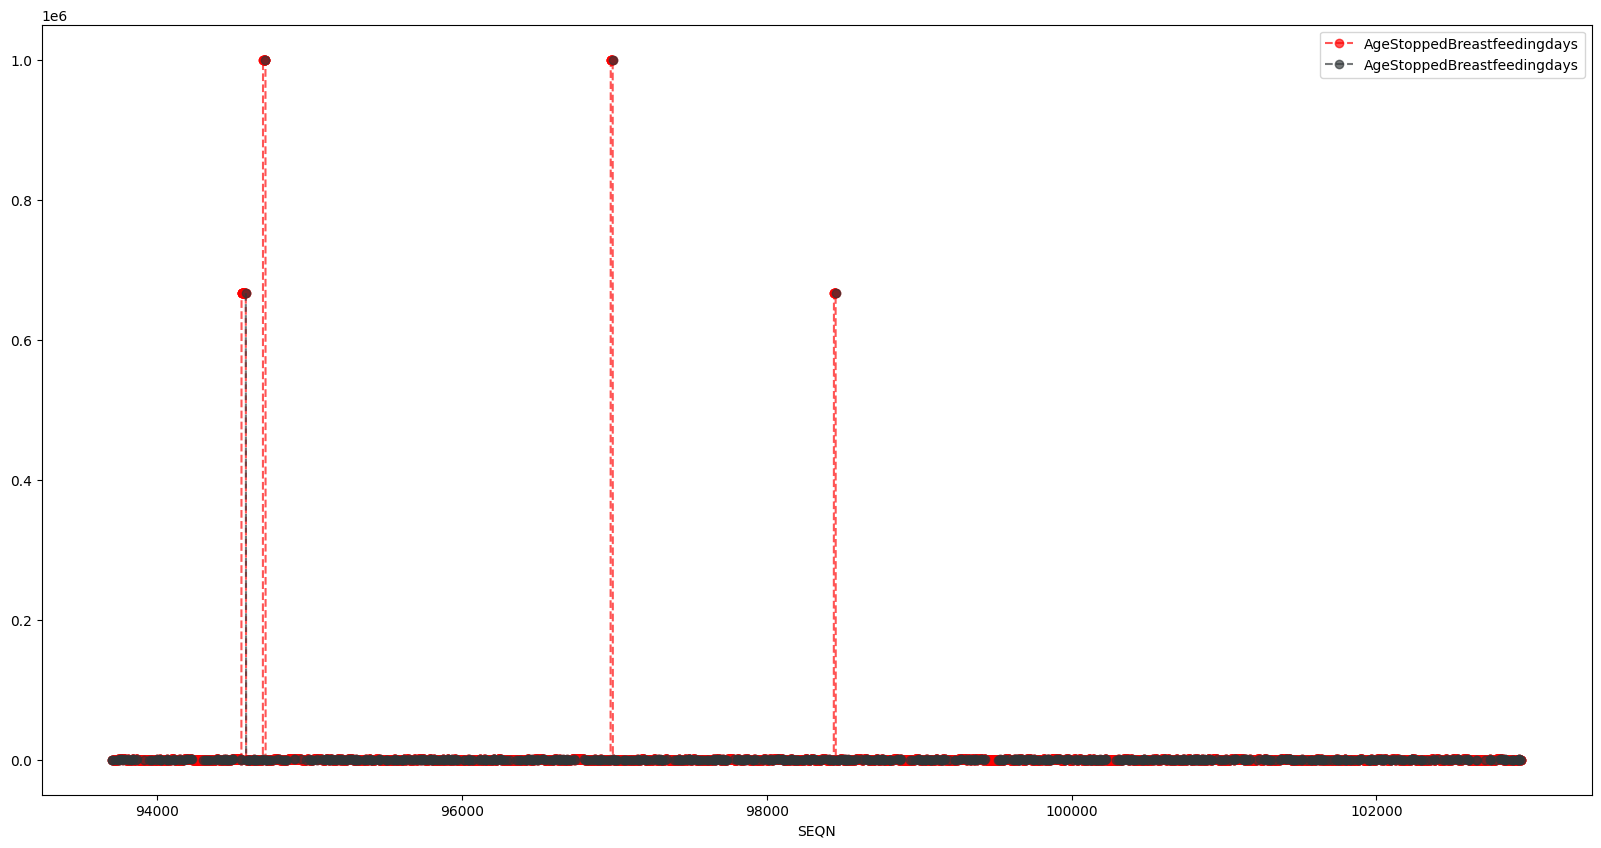

In [21]:
plt.figure(figsize=(20,10))
nhanes_df[variable].bfill().plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
nhanes_df[variable].plot(color='#313638',marker='o',alpha=6/9,linestyle='dashed')
plt.legend()
plt.show()

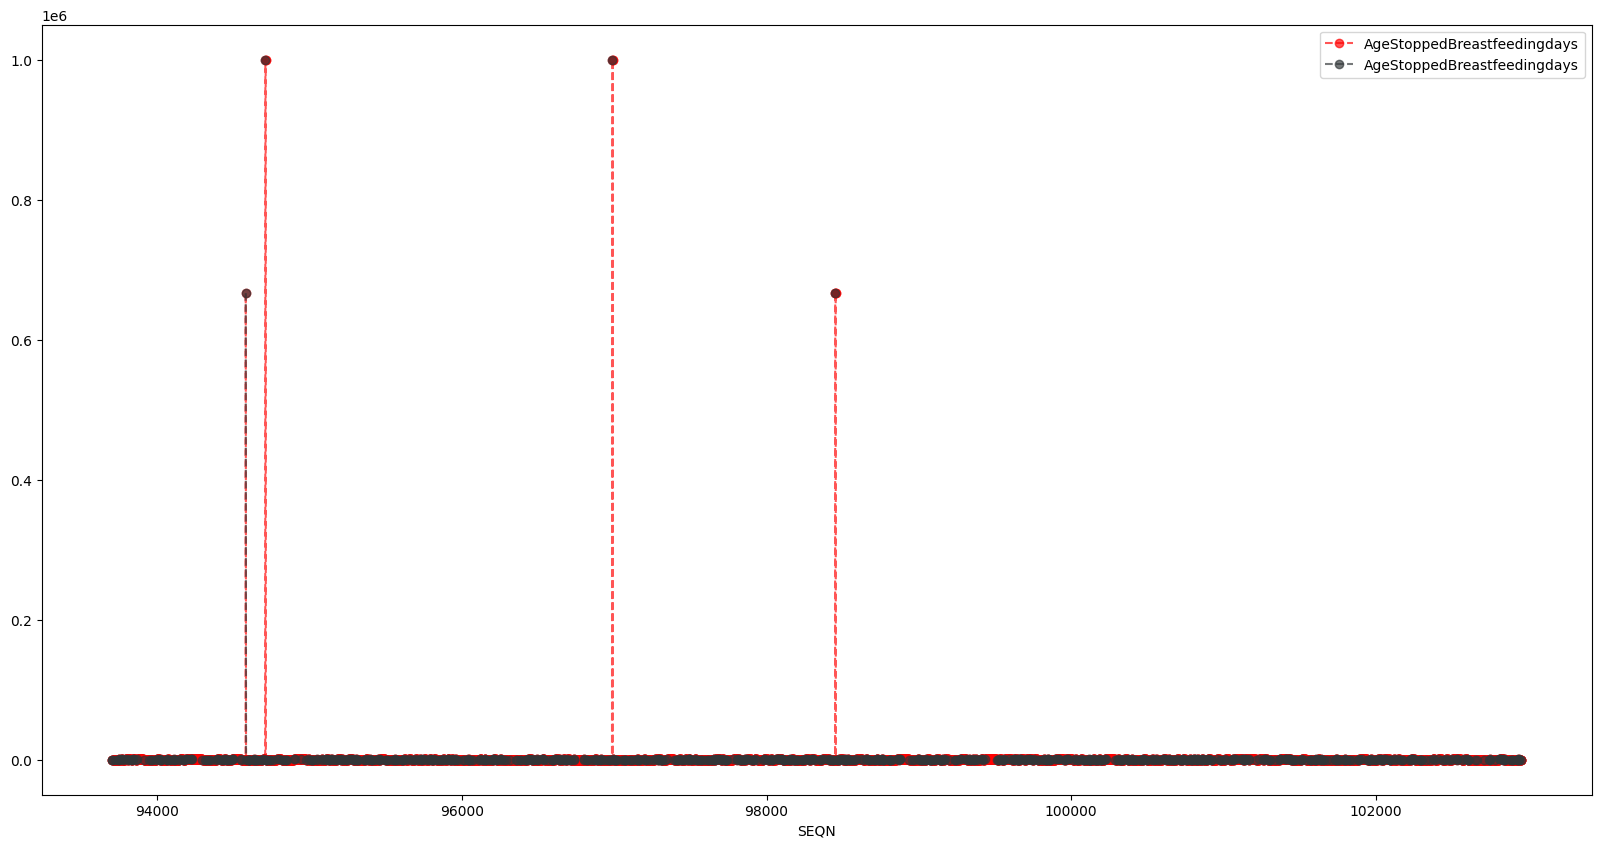

In [22]:
plt.figure(figsize=(20,10))
nhanes_df[variable].ffill().plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
nhanes_df[variable].plot(color='#313638',marker='o',alpha=6/9,linestyle='dashed')
plt.legend()
plt.show()

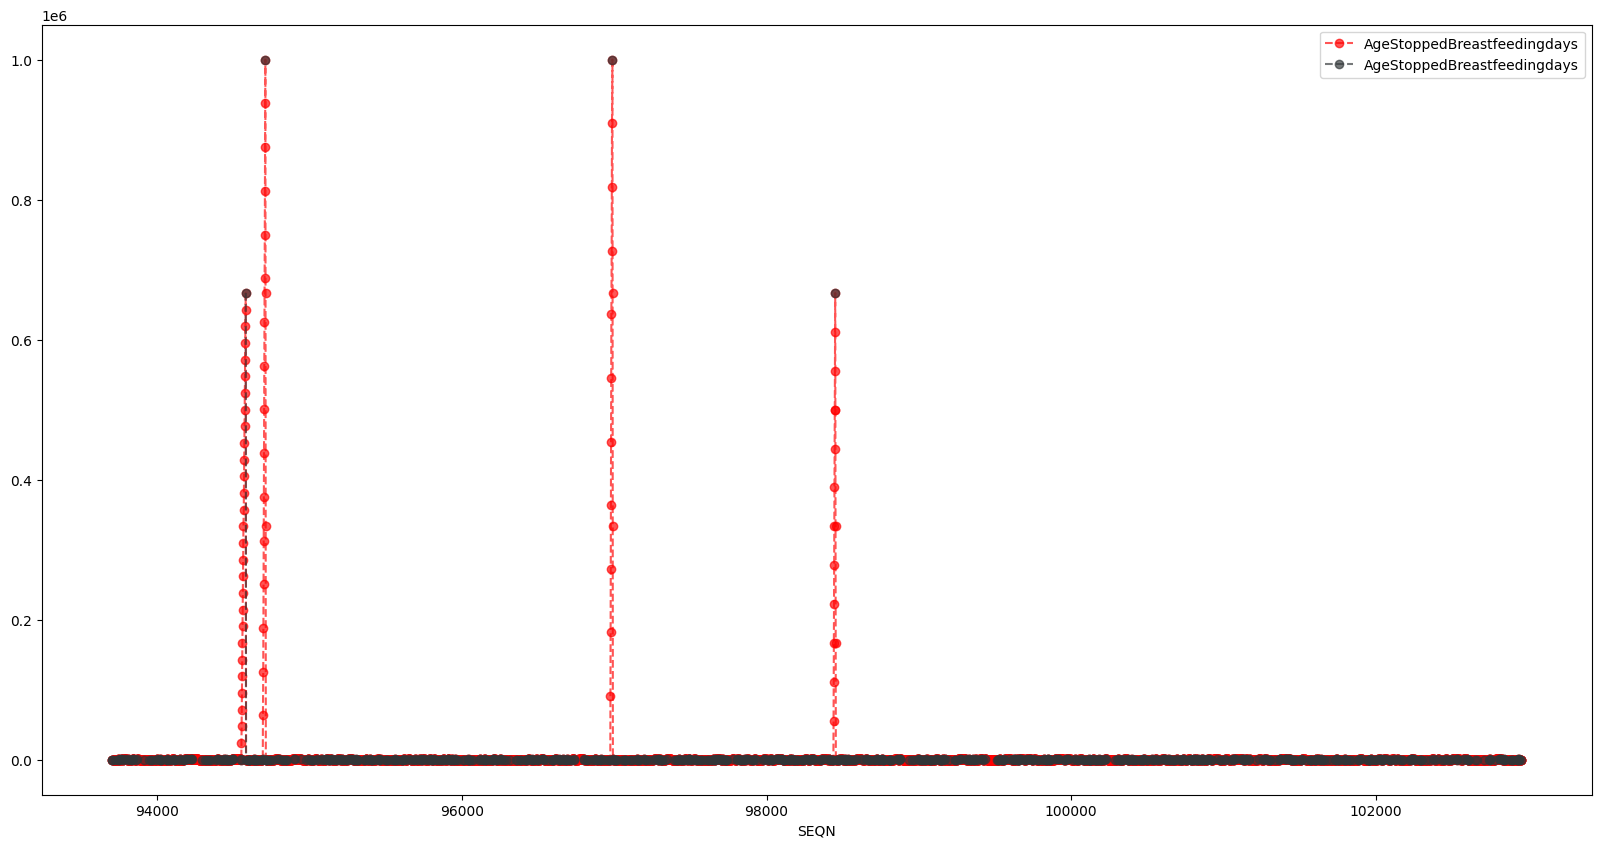

In [23]:
plt.figure(figsize=(20,10))
nhanes_df[variable].interpolate().plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
nhanes_df[variable].plot(color='#313638',marker='o',alpha=6/9,linestyle='dashed')
plt.legend()
plt.show()